### Special Functions: [Scipy](https://docs.scipy.org/doc/scipy/reference/special.html)

In [40]:
from __future__ import division
import numpy as np
from scipy.special import jn, yn, jn_zeros, yn_zeros # Bessel functions parameter
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sci
import scipy.special as sp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import seaborn as sns
sns.set()

### Bessel Functions

In [41]:
n = 0 # order zero
x = 0.0
# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))
x = 1.0
# Bessel function of second kind
print ("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


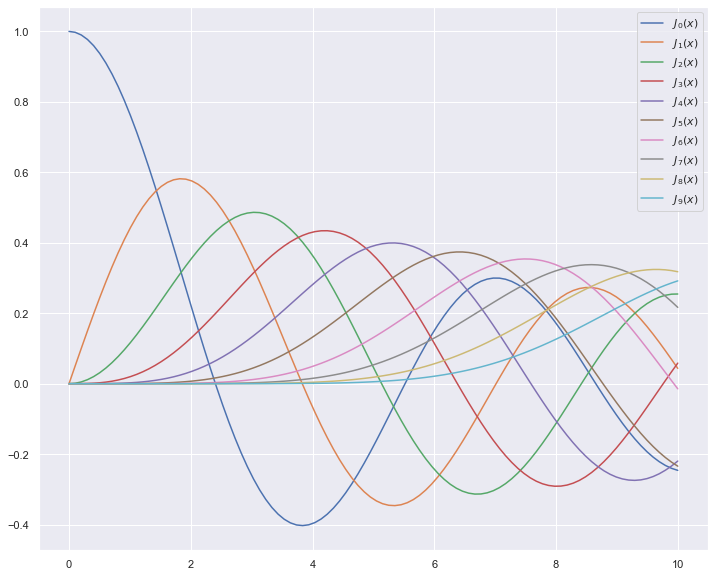

In [42]:
x = np.linspace(0, 10, 100)
plt.figure(figsize = (12,10))
for n in range(10):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
    plt.legend();

### Spherical Harmonics
\begin{equation}
Y^m_n(\theta,\phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} e^{i m \theta} P^m_n(\cos(\phi))
\end{equation}
Some examples are presented
\begin{equation}
Y_0^0(\theta, \phi) = \frac{1}{2} \sqrt{\frac{1}{\pi}}, Y_1^{-1}(\theta, \phi)= \frac{1}{2}\sqrt{\frac{3}{2 \pi}} e^{-i \theta} \sin(\phi), Y_1^0(\theta,\phi)= \frac{1}{2} \sqrt{\frac{3}{\pi}} \cos(\phi)
\end{equation}

In [43]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables

### Y(1,0)
In this case, l=1, m=0

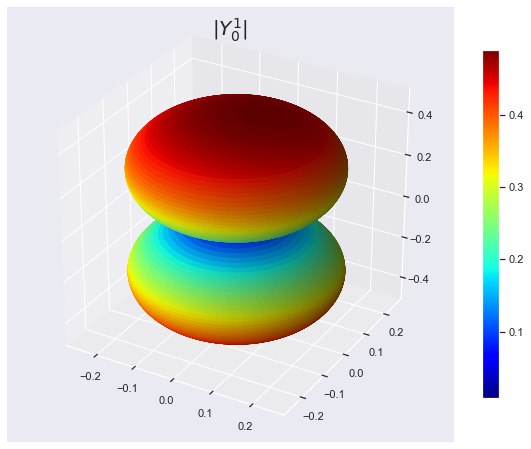

In [44]:
l = 1    #degree
m = 0   #order
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^1_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

### Y(2,0)

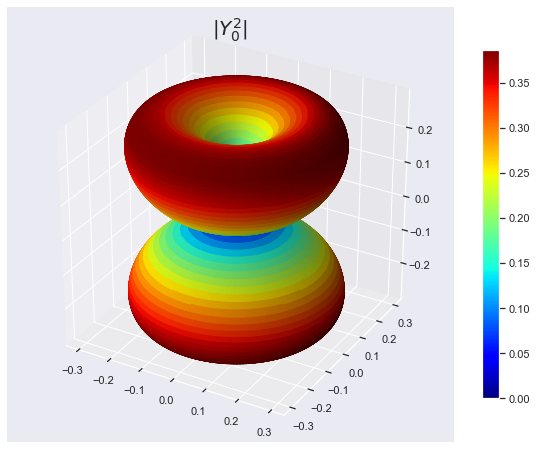

In [45]:
l = 2   #degree
m = 1  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

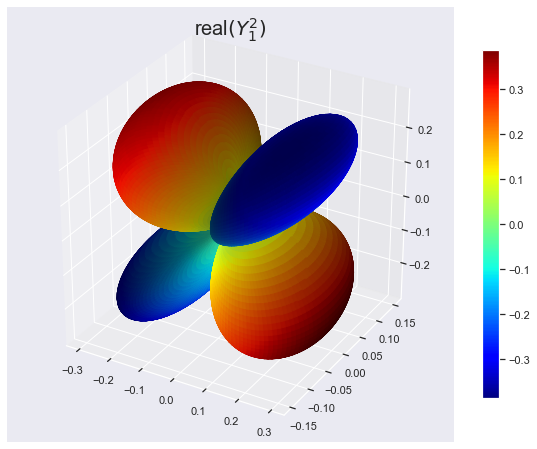

In [46]:
l = 2    # degree
m = 1    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 1)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

### Y(4,2)

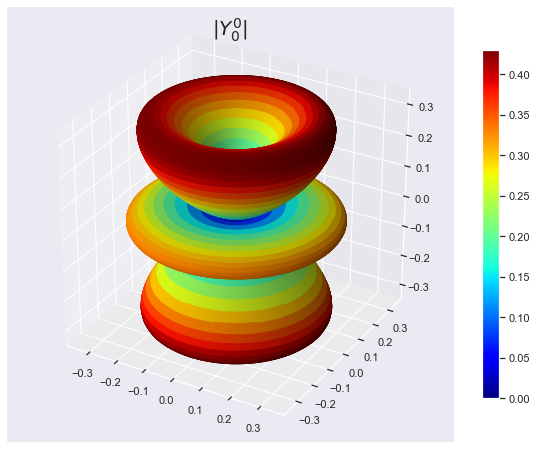

In [47]:
l = 4   #degree
m = 2  # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^0_ 0|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

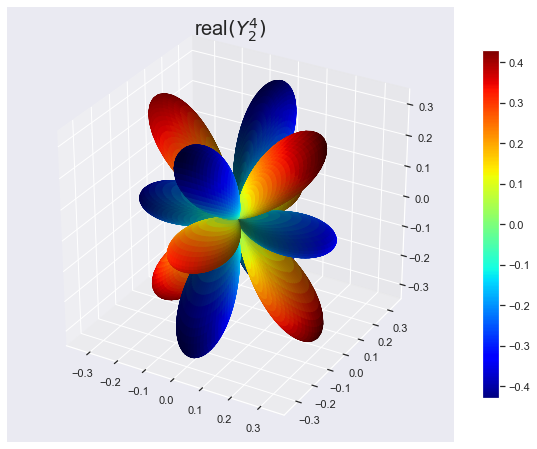

In [48]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^4_ 2)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

### Vibrating Circular Membrane
The vibrations of a thin circular membrane stretched across a rigid circular frame (such as a drum head) can be described as normal modes written in terms of Bessel functions:
\begin{equation}
\large{z(r,θ;t)=AJ_n(kr)\sin(nθ)\cos(kνt)}
\end{equation}

where $(r,θ)$ describes a position in polar co-ordinates with the origin at the centre of the membrane, t is time and v is a constant depending on the tension and surface density of the drum. The modes are labelled by integers $n=0,1,⋯ $ and $m=1,2,3,⋯$ where k is the mth zero of $J_n$.

The following program produces a plot of the displacement of the membrane in the n=3,m=2 normal mode at time t=0


![](mv2.gif)

In [49]:
import numpy as np
from scipy.special import jn, jn_zeros
import pylab
import seaborn as sns
sns.set()
def displacement(n, m, r, theta):
    """
    Calculate the displacement of the drum membrane at (r, theta; t=0)
    in the normal mode described by integers n >= 0, 0 < m <= mmax.

    """

    # Pick off the mth zero of Bessel function Jn
    k = jn_zeros(n, mmax+1)[m]
    return np.sin(n*theta) * jn(n, r*k)

### Single plot

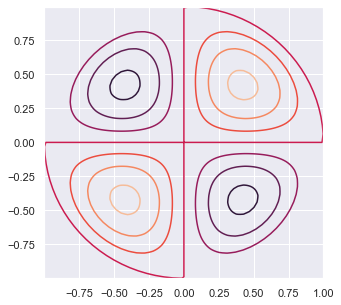

In [50]:
# Allow calculations up to m = mmax
mmax =10
# Positions on the drum surface are specified in polar co-ordinates
r = np.linspace(0, 1, 100)
theta = np.linspace(0, 2 * np.pi, 100)

# Create arrays of cartesian co-ordinates (x, y) ...
x = np.array([rr*np.cos(theta) for rr in r])
y = np.array([rr*np.sin(theta) for rr in r])
# ... and vertical displacement (z) for the required normal mode at
# time, t = 0
n0, m0 = 2,0
z = np.array([displacement(n0, m0, rr, theta) for rr in r])
plt.figure(figsize = [5,5])
pylab.contour(x, y, z)
pylab.show()

### 3D plot

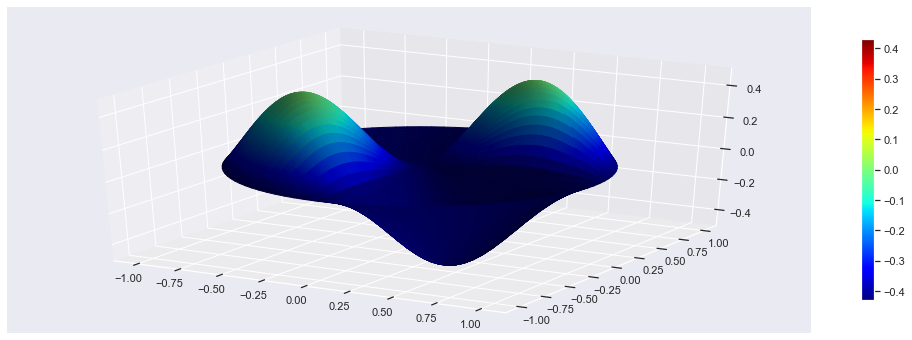

In [53]:
r, theta = np.mgrid[0:1:100j, 0:2*np.pi:100j] 
x = r*np.cos(theta)
y = r*np.sin(theta)
z = displacement(n0, m0, r, theta)
N = z/(z.max() -z.min())
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,6))
im = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(N))
mm = cm.ScalarMappable(cmap=cm.jet)
mm.set_array(R)    
fig.colorbar(mm, shrink=0.8);

### Multoplot

TypeError: Input z must be a 2D array.

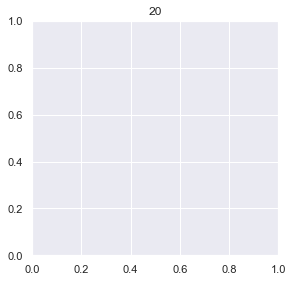

In [64]:
plt.figure(figsize = [15,25])
k = 0
for n in range(6):
    for m in range(n-1):
        k = k+1
        z = np.array([displacement(n, m, rr, theta) for rr in r])

        plt.subplot(5,3,k)
        plt.title(str(n) + str(m))
        pylab.contour(x, y, z)
pylab.show()

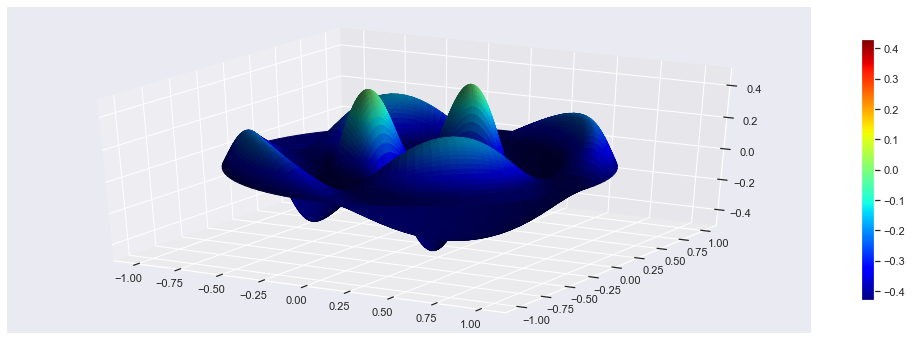

In [63]:
n0,m0 = 2,2
r, theta = np.mgrid[0:1:100j, 0:2*np.pi:100j] 
x = r*np.cos(theta)
y = r*np.sin(theta)
z = displacement(n0, m0, r, theta)
N = z/(z.max() -z.min())
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(18,6))
im = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.jet(N))
mm = cm.ScalarMappable(cmap=cm.jet)
mm.set_array(R)    
fig.colorbar(mm, shrink=0.8);

#### Some useful links:
[Spherical harmonics in Python](http://balbuceosastropy.blogspot.com/2015/06/spherical-harmonics-in-python.html)

[Vibration of Circular membrane](https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane)

[Vibrational modes of a circular membrane](https://www.acs.psu.edu/drussell/Demos/MembraneCircle/Circle.html)